# Logistic Regression

In this notebook, we will implement logistic regression in 2 ways

1. Scratch
2. using `sklearn` module

In [1]:
# Let's import the required libraries
import numpy as np
import pandas as pd

%matplotlib inline
import matplotlib.pyplot as plt

from sklearn.linear_model import LogisticRegression

In [2]:
# Load in the dataset
data = pd.read_csv("data/telecom_churn.csv")

data.head()

,Churn,AccountWeeks,ContractRenewal,DataPlan,DataUsage,CustServCalls,DayMins,DayCalls,MonthlyCharge,OverageFee,RoamMins
0,0,128,1,1,2.7,1,265.1,110,89.0,9.87,10.0
1,0,107,1,1,3.7,1,161.6,123,82.0,9.78,13.7
2,0,137,1,0,0.0,0,243.4,114,52.0,6.06,12.2
3,0,84,0,0,0.0,2,299.4,71,57.0,3.10,6.6
4,0,75,0,0,0.0,3,166.7,113,41.0,7.42,10.1


### Get the information about the dataaset

In [3]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3333 entries, 0 to 3332
Data columns (total 11 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   Churn            3333 non-null   int64  
 1   AccountWeeks     3333 non-null   int64  
 2   ContractRenewal  3333 non-null   int64  
 3   DataPlan         3333 non-null   int64  
 4   DataUsage        3333 non-null   float64
 5   CustServCalls    3333 non-null   int64  
 6   DayMins          3333 non-null   float64
 7   DayCalls         3333 non-null   int64  
 8   MonthlyCharge    3333 non-null   float64
 9   OverageFee       3333 non-null   float64
 10  RoamMins         3333 non-null   float64
dtypes: float64(5), int64(6)
memory usage: 286.6 KB


In [4]:
data.describe()

,Churn,AccountWeeks,ContractRenewal,DataPlan,DataUsage,CustServCalls,DayMins,DayCalls,MonthlyCharge,OverageFee,RoamMins
count,3333.000000,3333.000000,3333.000000,3333.000000,3333.000000,3333.000000,3333.000000,3333.000000,3333.000000,3333.000000,3333.000000
mean,0.144914,101.064806,0.903090,0.276628,0.816475,1.562856,179.775098,100.435644,56.305161,10.051488,10.237294
std,0.352067,39.822106,0.295879,0.447398,1.272668,1.315491,54.467389,20.069084,16.426032,2.535712,2.791840
min,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,14.000000,0.000000,0.000000
25%,0.000000,74.000000,1.000000,0.000000,0.000000,1.000000,143.700000,87.000000,45.000000,8.330000,8.500000
50%,0.000000,101.000000,1.000000,0.000000,0.000000,1.000000,179.400000,101.000000,53.500000,10.070000,10.300000
75%,0.000000,127.000000,1.000000,1.000000,1.780000,2.000000,216.400000,114.000000,66.200000,11.770000,12.100000
max,1.000000,243.000000,1.000000,1.000000,5.400000,9.000000,350.800000,165.000000,111.300000,18.190000,20.000000


In [5]:
# Find the missing values
data.isna().sum()

Churn              0
AccountWeeks       0
ContractRenewal    0
DataPlan           0
DataUsage          0
CustServCalls      0
DayMins            0
DayCalls           0
MonthlyCharge      0
OverageFee         0
RoamMins           0
dtype: int64

### Data Preparation

In [6]:
from sklearn.model_selection import train_test_split


X, y = data.drop("Churn", axis=1).values, data["Churn"].values

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# View the shape
X_train.shape, y_train.shape, X_test.shape, y_test.shape

((2666, 10), (2666,), (667, 10), (667,))

In [7]:
from sklearn.preprocessing import StandardScaler

scaler= StandardScaler()

X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

## Modelling

In [8]:
def sigmoid(z):
    return np.where(z >= 0, 
                    1 / (1 + np.exp(-z)), 
                    np.exp(z) / (1 + np.exp(z)))


In [9]:
def initialize_paramters(n_features):
    return np.zeros(n_features)

In [10]:
def compute_cost(X, y, theta):
    m = len(y)
    h = sigmoid(X @ theta)
    
    # Clip h to avoid log(0)
    epsilon = 1e-15
    h = np.clip(h, epsilon, 1 - epsilon)
    
    cost  =  (-1/ m) * np.sum((y * np.log(h)) + (1- y) * np.log(1 - h)) # same as sklearn logloss
    return cost

compute_cost(X_train, y_train, initialize_paramters(10))

np.float64(0.6931471805599453)

In [11]:
def gradient_descent(X, y, theta, alpha, n_iterations = 10):
    m = len(y)
    cost_history = []

    for i in range(n_iterations):
            h = sigmoid( X @ theta)

            gradient = np.transpose(X) @ ( h - y ) # shape of X (1, n) and shape of (y - h) is (1, n) we want final shape (1, 1)

            theta = theta -  (alpha * gradient)

            cost = compute_cost(X, y, theta)

            cost_history.append(cost)

    return theta, cost_history

             

In [12]:
theta_trained, cost_history = gradient_descent(X_train, y_train, initialize_paramters(10), 0.01, 10000)

In [16]:
# Use your own trained theta
h = sigmoid(X_test @ theta_trained)

# IMPORTANT: clip h to avoid log(0)
epsilon = 1e-15
h = np.clip(h, epsilon, 1 - epsilon)

m = len(y)
own_cost = (-1 / m) * np.sum(y_test * np.log(h) + (1 - y_test) * np.log(1 - h))
y_pred_scratch = (h >= 0.5).astype(int)
print(f"My Model Log Loss: {own_cost:.5f}")


My Model Log Loss: 1.29896


### using `sklearn` library

In [17]:
from sklearn.metrics import log_loss

log_reg = LogisticRegression(fit_intercept=False, penalty=None, solver='lbfgs', max_iter=10000)

log_reg.fit(X_train, y_train)

y_probs = log_reg.predict_proba(X_test)[:, 1]

sklearn_cost = log_loss(y_test, y_probs)



In [20]:
from sklearn.metrics import accuracy_score 
print(f"Sklearn Log Loss: {sklearn_cost:.5f}")
print(f"My Model Log Loss: {own_cost:.5f}")

y_proba_sklearn = log_reg.predict(X_test)
print(f"Sklearn Accuracy: {accuracy_score(y_test, y_proba_sklearn):.5f}")
print(f"My Model Accuracy: {accuracy_score(y_test, y_pred_scratch):.5f}")

Sklearn Log Loss: 0.64348
My Model Log Loss: 1.29896
Sklearn Accuracy: 0.68366
My Model Accuracy: 0.62219


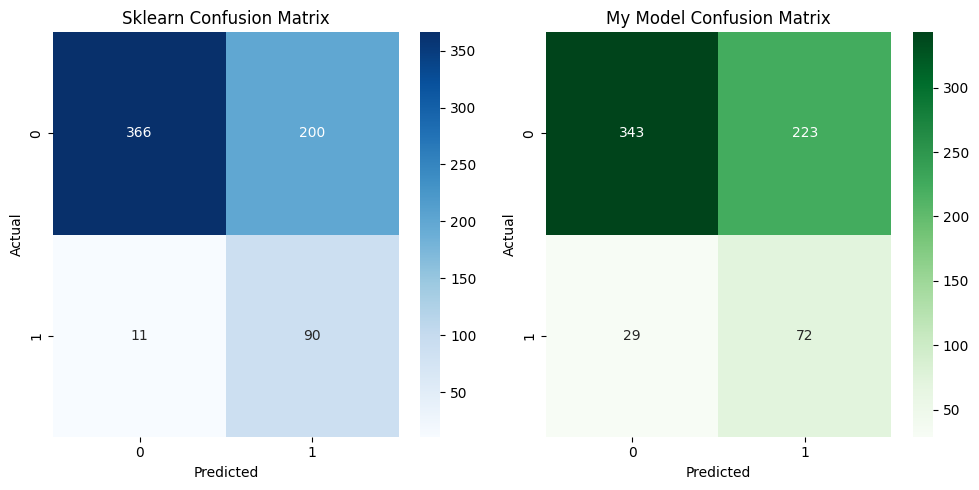

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.metrics import confusion_matrix

# === 1. Get predicted classes ===
y_pred_sklearn = log_reg.predict(X_test)  # Sklearn's prediction
y_pred_scratch = (sigmoid(X_test @ theta_trained) >= 0.5).astype(int)  # Your model's prediction

# === 2. Compute confusion matrices ===
cm_sklearn = confusion_matrix(y_test, y_pred_sklearn)
cm_scratch = confusion_matrix(y_test, y_pred_scratch)

# === 3. Plot confusion matrices ===
plt.figure(figsize=(10, 5))

# Sklearn CM
plt.subplot(1, 2, 1)
sns.heatmap(cm_sklearn, annot=True, fmt='d', cmap='Blues')
plt.title('Sklearn Confusion Matrix')
plt.xlabel('Predicted')
plt.ylabel('Actual')

# Your model CM
plt.subplot(1, 2, 2)
sns.heatmap(cm_scratch, annot=True, fmt='d', cmap='Greens')
plt.title('My Model Confusion Matrix')
plt.xlabel('Predicted')
plt.ylabel('Actual')

plt.tight_layout()
plt.show()


In [26]:
from sklearn.metrics import classification_report

# === 1. Sklearn model report ===
print("=== Sklearn Classification Report ===")
print(classification_report(y_test, y_pred_sklearn))

# === 2. Your scratch model report ===
print("=== My Model Classification Report ===")
print(classification_report(y_test, y_pred_scratch))


=== Sklearn Classification Report ===
              precision    recall  f1-score   support

           0       0.97      0.65      0.78       566
           1       0.31      0.89      0.46       101

    accuracy                           0.68       667
   macro avg       0.64      0.77      0.62       667
weighted avg       0.87      0.68      0.73       667

=== My Model Classification Report ===
              precision    recall  f1-score   support

           0       0.92      0.61      0.73       566
           1       0.24      0.71      0.36       101

    accuracy                           0.62       667
   macro avg       0.58      0.66      0.55       667
weighted avg       0.82      0.62      0.68       667

